# Import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.utils import resample
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline
import warnings
from sklearn.decomposition import PCA
warnings.filterwarnings("ignore")
sns.set(color_codes = True)
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

# Load the dataset

In [2]:
data = pd.read_csv('concrete (1).csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


Understanding from the Concrete dataset :
    Cement, slag, ash, water, superplasticizer, coarse aggregate and fine aggregate are measured in kg in a m3 mixture.
    Age - day(1~365)
    Concrete compressive strength - measured in MPa, which is our target variable.

#  Deliverable-1 : Univariate analysis

In [3]:
# shape of the data:
data.shape

(1030, 9)

There are 1030 rows and 9 columns in the dataset.

In [4]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [5]:
# Data type of each attribute:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Here we can see that all the variables are numerical.

In [6]:
# Checking the presence of missing values : 
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There is no missing values in any of the columns.

In [7]:
# Descriptive Statistics : 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


From the above describe summary:
    Cement - The range of cement is [102,540]with median 273. The  Mean is more than median that means there could be slight 
             skewness on the right.
    
    Slag - The range of slag is [0,359.4] with median 22. The mean is more than median that means there could be skewness on 
           the right.
        
    Ash - The range of ash is [0,200.1] with median 0. The mean is more than median that means there could be skewness on 
          the right.
        
   Water - The range of water is [121.8, 247] with median 185. The mean is slightly less than median that means there could be
          skewness on the left.
    
   Superplastic - The range of the superplastic is [0,32.2] with median 6.4. The mean is almost equal to the median that means 
              there might not be any skewness.
    
    Coarseagg - The range of the coarseagg is [801,1145] with median 968. The mean is slightly more than median that means
              there could be skewness on the right.
        
    Fineagg - The range of the fineagg is [594, 992.6] with median 779.5. The mean is slightly less than median that means
             there could be skewness on the left.
        
     Age - The range of the age is [1,365] with median 28 . The mean is more than median that means there could be skewness 
          on the right.
        
   Strength - The range of the strength is [2.33, 82.6] with median 34.44. The mean is more than median that means there 
           could be skewness on the right.

# Analysis of each attributes with the help of plots:

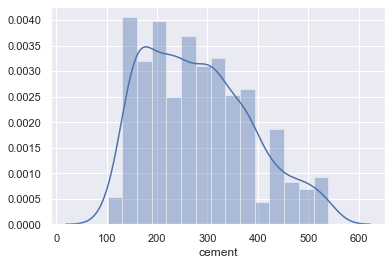

In [8]:
sns.distplot(data['cement'])

 cement  is almost normally distributed.

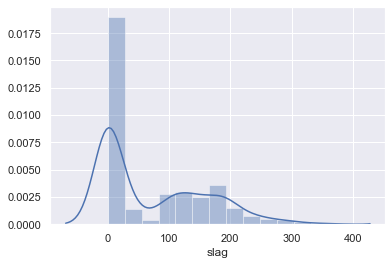

In [9]:
sns.distplot(data['slag'])

The distribution of the slag is right skewed, because the tail goes to the right.

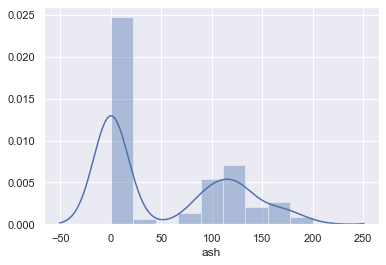

In [10]:
sns.distplot(data['ash'])


The distribution of the ash is also right skewed.Ash has two gaussians.

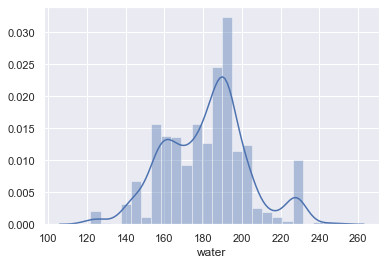

In [11]:
sns.distplot(data['water'])

The distribution of the water column is left skewed as the tail goes to the left side. It has three gaussians.

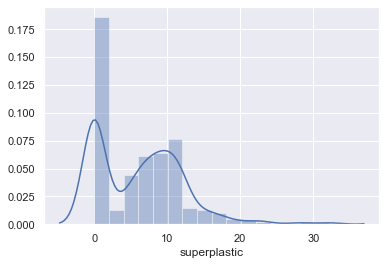

In [12]:
sns.distplot(data['superplastic'])

There is right skewness because tail is at right side (mean>median). Superplastic has two gaussians.

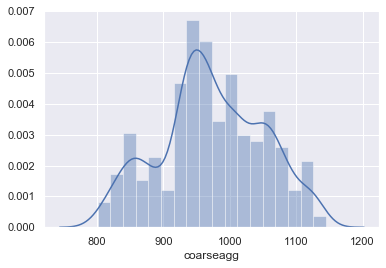

In [13]:
sns.distplot(data['coarseagg'])

The distribution of the coarseagg is almost normal.It has three gaussians.

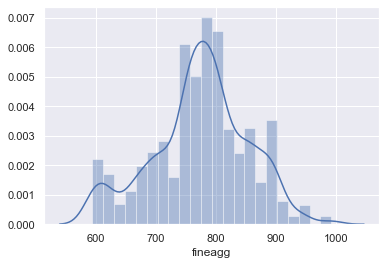

In [14]:
sns.distplot(data['fineagg'])

The distribution of fineagg is rightly skewed . It has almost two gaussians.

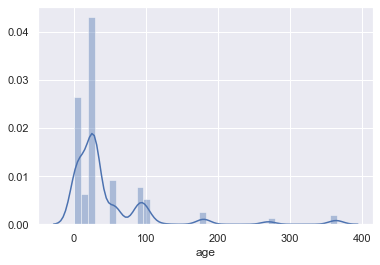

In [15]:
sns.distplot(data['age'])

Age has multiple gaussians and rightly skewed.

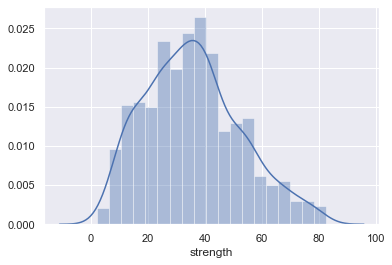

In [16]:
sns.distplot(data['strength'])

There is right skewness because tail goes to right side.

# Multivariable analysis

# Pair plot that includes all the columns of the dataframe.

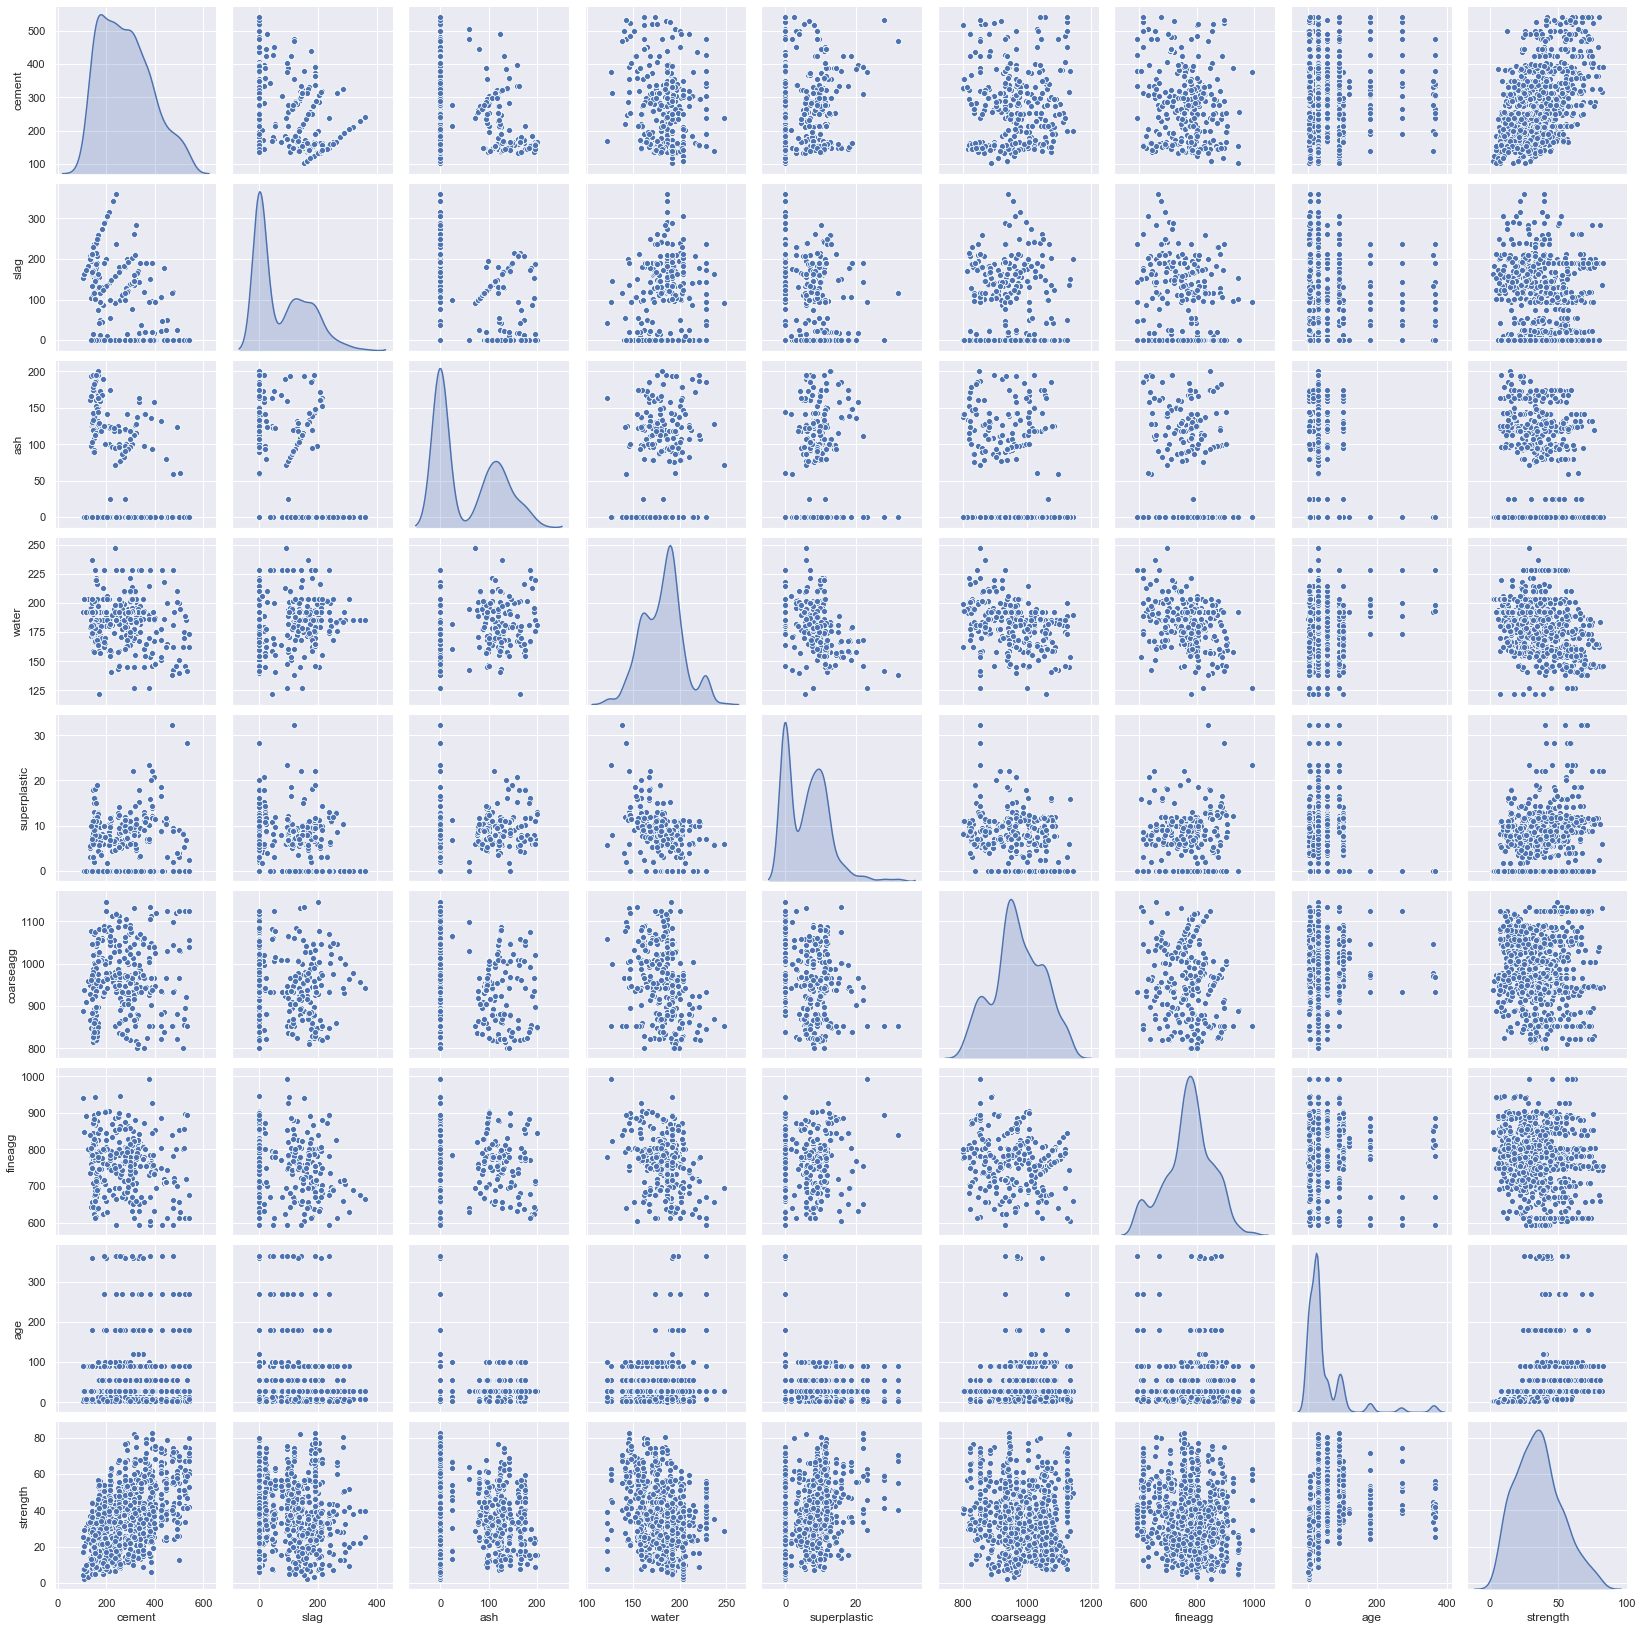

In [17]:
sns.pairplot(data, diag_kind = 'kde')

From the above pair plot we can observe that the relationship between the attributes and the target column.
There is no high correlation between any two features.
Strength have some positive linear relation with cement that means if the quantity of cement increases then the strength of 
concrete also increases. 
Strength have some positive linear relation with superplastic that means if the quantity of superplastic is more then 
concrete is having more strength.
More strength is between 20 to  150 days.
Also it is observed that multiple gaussian in slag, ash, water, superplastic,age.
We will do cluster analysis to understand any hidden clusters in the dataset.


# Correlation using Heatmap

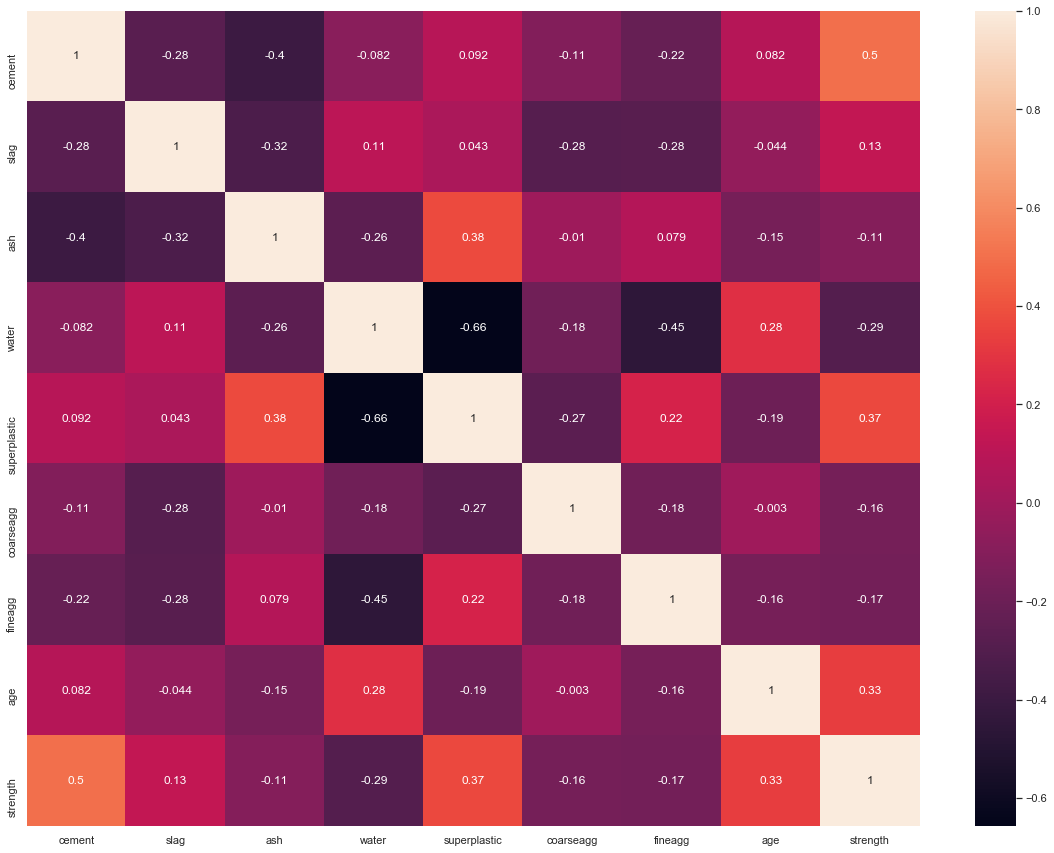

In [18]:
plt.figure(figsize = (20,15))
sns.heatmap(data.corr(), annot = True)
plt.show()

As observed while analysing pairplot, there doesnot seem to be very high correlation between independent variables.

There seems to be some correlation between superplastic and ash.

There seems to be some correlation between cement and strength.

There seems to be some correlation between strength and age.

There seems to be some correlation between strength and superplastic.

# Checking the presence of outliers

There is no any missing values in the dataset so we donot need to imputation for the missing values.

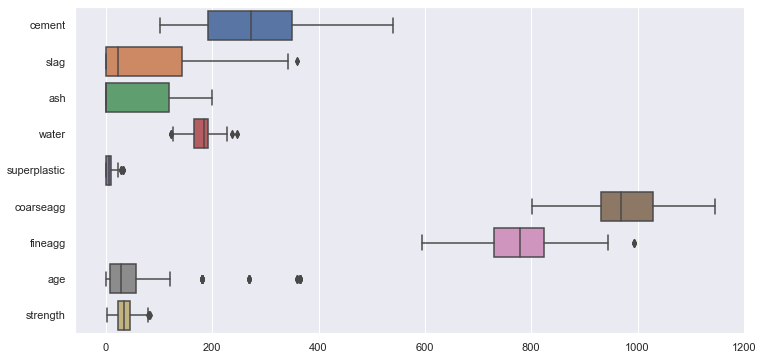

In [19]:
plt.figure(figsize = (12,6))
sns.boxplot(data = data, orient = 'h')

From the above box plot, we observe that there are some outliers in the given dataset.
There are multiple ways to deal with outliers .
Here I am going to replace the outliers with median. 

# Dealing with outliers

In [20]:
for col_name in data.columns[:-1]:
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1 
    low = q1 - 1.5*iqr
    high = q3 + 1.5*iqr
    
    data.loc[(data[col_name]< low) | (data[col_name]> high), col_name] = data[col_name].median()

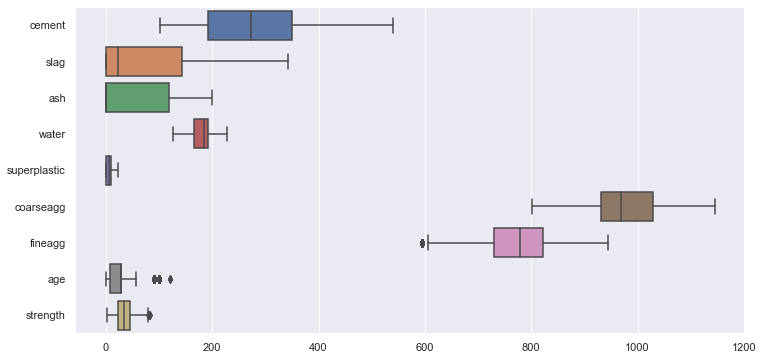

In [21]:
plt.figure(figsize = (12, 6))
sns.boxplot(data = data, orient = "h")

Now we can see that most of the outliers are replaced with their median values. we also observe that most of the outliers are removed but because of the gaussian by replacing it with median value, there are some new outliers which can be ignored.

In [22]:
# After fixing outliers shape of the dataframe:
data.shape

(1030, 9)

# Deliverable - 2 (Feature Engineering techniques:)

# Identify opportunities to create a composite feature ,drop a feature

In [23]:
# creation of a composite feature
# For testing strength and durability of concrete mix is the water to cement ratio.
# we will compute and add this attribute.

data['w/c ratio'] = data['water']/data['cement']
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,w/c ratio
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,1.440198
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,0.937241
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,0.749600
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,0.857143
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,1.248708


In [24]:
# It is always better to make a copy of the data before applying any transformation on data
data1 = data.copy()

# Here we use PCA for dimensionality reduction

In [25]:
#scaling the data
data1_scaled = data1.apply(zscore)
X_scaled = data1_scaled.drop('strength', axis = 1)


In [26]:
covMatrix = np.cov(X_scaled, rowvar = False)

In [27]:
# Choosing PCA components to be 8 and fitting it on the scaled data.
# To check the variance explained by 8 components.
# We will finalise the components basis the count of components required to explain 95% variance.
pca = PCA(n_components = 8)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
# computing the eigen values
print(pca.explained_variance_)

[2.255458   2.14737655 1.38230671 1.01950141 0.98937058 0.9095476
 0.17785404 0.08631881]


In [29]:
# computing the eigen vectors
print(pca.components_)

[[-0.47984592  0.33302567 -0.0314006   0.440224   -0.32935626 -0.02310918
  -0.13317576 -0.03337806  0.57982685]
 [ 0.43729433  0.03738942 -0.50739864  0.37111299 -0.42105049  0.04159378
  -0.37017582 -0.09055711 -0.29656902]
 [ 0.11608845  0.61498968 -0.18472156 -0.07629728  0.37661356 -0.64467564
  -0.07743102 -0.05623571 -0.0420162 ]
 [-0.00213501  0.21389428  0.31524226 -0.0758463   0.30301369  0.38961159
  -0.77497491  0.05961247 -0.03687941]
 [ 0.02725868  0.03404457 -0.07360463  0.07214509 -0.03156949 -0.05503527
   0.00936864  0.9915063  -0.01665355]
 [ 0.1422388  -0.40844284  0.52688291  0.46526383  0.02799977 -0.52733414
  -0.19825655 -0.01153107 -0.02371987]
 [ 0.10231299  0.2735871   0.42633467 -0.46280517 -0.68710541 -0.17726876
  -0.05717413  0.02013791 -0.10733032]
 [ 0.45783046 -0.26254476 -0.17307033 -0.33261021  0.00846546 -0.10009792
  -0.19207343  0.01657972  0.73049317]]


In [30]:
print(pca.explained_variance_ratio_)

[0.25036314 0.23836575 0.15344052 0.11316796 0.10982334 0.10096273
 0.01974237 0.00958167]


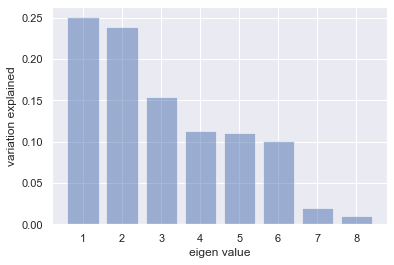

In [31]:
plt.bar(list(range(1,9)),pca.explained_variance_ratio_, alpha = 0.5, align = 'center')
plt.xlabel('eigen value')
plt.ylabel('variation explained')
plt.show()

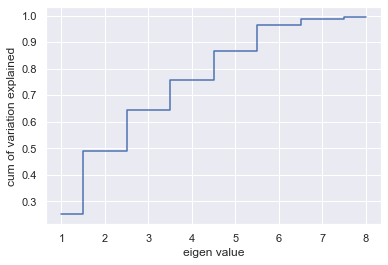

In [32]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_),where = 'mid')
plt.xlabel('eigen value')
plt.ylabel('cum of variation explained')
plt.show()

In [33]:
# cumulating explained variance ratio to identify how many principal components are required to explain 95% of the variance
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
# print("cumulative variance explained")
pd.DataFrame(cum_var_exp, columns = ['Cumulative Variance Explained'], index = ['1','2','3','4','5','6','7','8'])


,Cumulative Variance Explained
1,0.250363
2,0.488729
3,0.642169
4,0.755337
5,0.865161
6,0.966123
7,0.985866
8,0.995447


Here we observe that 6 components explain over 95% of the variance .Hence we will take 6 components.

In [34]:
pca6 = PCA(n_components = 6)
pca6.fit(X_scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(X_scaled)
y = data1_scaled['strength']

[[-0.47984592  0.33302567 -0.0314006   0.440224   -0.32935626 -0.02310918
  -0.13317576 -0.03337806  0.57982685]
 [ 0.43729433  0.03738942 -0.50739864  0.37111299 -0.42105049  0.04159378
  -0.37017582 -0.09055711 -0.29656902]
 [ 0.11608845  0.61498968 -0.18472156 -0.07629728  0.37661356 -0.64467564
  -0.07743102 -0.05623571 -0.0420162 ]
 [-0.00213501  0.21389428  0.31524226 -0.0758463   0.30301369  0.38961159
  -0.77497491  0.05961247 -0.03687941]
 [ 0.02725868  0.03404457 -0.07360463  0.07214509 -0.03156949 -0.05503527
   0.00936864  0.9915063  -0.01665355]
 [ 0.1422388  -0.40844284  0.52688291  0.46526383  0.02799977 -0.52733414
  -0.19825655 -0.01153107 -0.02371987]]
[0.25036314 0.23836575 0.15344052 0.11316796 0.10982334 0.10096273]


In [35]:
# split the data into train and test set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca6, y, test_size = 0.30, random_state = 1)

In [36]:
# lets check split of the data
print("{0:0.2f}% data is in training set".format((len(X_train_pca)/len(data1.index))*100))
print("{0:0.2f}% data is in test set".format((len(X_test_pca)/len(data1.index))*100))

70.00% data is in training set
30.00% data is in test set


# Decide on complexity of the model,should it be simple linear model in terms of parameters or would a quadratic or higher degree.

At first we will build our model by linear regression, basis the performance of the algorithm, we will try other model.
We will also try polynomial regression algorithm .The model buliding and analysing the best model will be done.
we will train the following regression algorithms : 
    Linear Regression
    
    Ridge  Regression 
     
    Lasso  Regression
    
    Polynomial Regression
    
    Random Forest
    
    Ada Boost
    
    SVR
    
    Gradient Boost
    
    Decision Tree

# Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength.

As we analysed by pair plot , in the dataset there are 3 to 4 Gaussians in multiple variables(slag, ash, superplastic).
We will do cluster analysis to understand hidden clusters in the dataset.
We will use K-Means clustering. we will cosider that the dataset has 2-6 clusters.


In [37]:
kdata = data.copy()

In [38]:
cluster_range = range(2,6)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(kdata)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,2,2.774887e+07
1,3,2.141031e+07
2,4,1.868909e+07
3,5,1.659588e+07


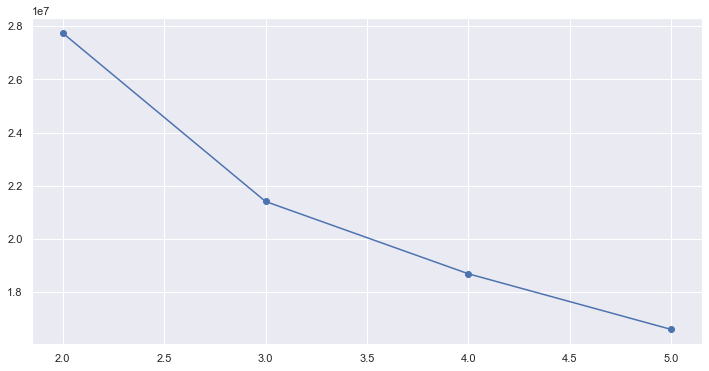

In [39]:
# Elbow plot to ascertain the number of clusters
plt.figure(figsize = (12,6))
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors, marker = "o")

From the Elbow plot, we observe that there are 3 good clusters.

In [40]:
# lets start k = 3
kdata_z = kdata.apply(zscore)
cluster = KMeans(n_clusters = 3, random_state = 1)
cluster.fit(kdata_z)
prediction = cluster.predict(kdata_z)
kdata_z["GROUP"] = prediction
kdata_z_copy = kdata_z.copy(deep = True)

In [41]:
centroids =cluster.cluster_centers_
centroids
  

array([[-0.88793038,  0.1013797 ,  0.64372087,  0.01596731,  0.12329867,
         0.10041456,  0.21718932,  0.02008777, -0.47649243,  0.86931747],
       [ 0.76530252,  0.18100875, -0.07031489, -0.89287978,  0.94615257,
        -0.50388077,  0.15569448,  0.09985706,  0.97610611, -0.88088869],
       [ 0.50036757, -0.30011754, -0.8014029 ,  0.78692246, -1.02230607,
         0.32125293, -0.43282954, -0.11740179, -0.24339646, -0.37070722]])

In [42]:
centroid_df = pd.DataFrame(centroids,columns = list(kdata))
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,w/c ratio
0,-0.887930,0.101380,0.643721,0.015967,0.123299,0.100415,0.217189,0.020088,-0.476492,0.869317
1,0.765303,0.181009,-0.070315,-0.892880,0.946153,-0.503881,0.155694,0.099857,0.976106,-0.880889
2,0.500368,-0.300118,-0.801403,0.786922,-1.022306,0.321253,-0.432830,-0.117402,-0.243396,-0.370707


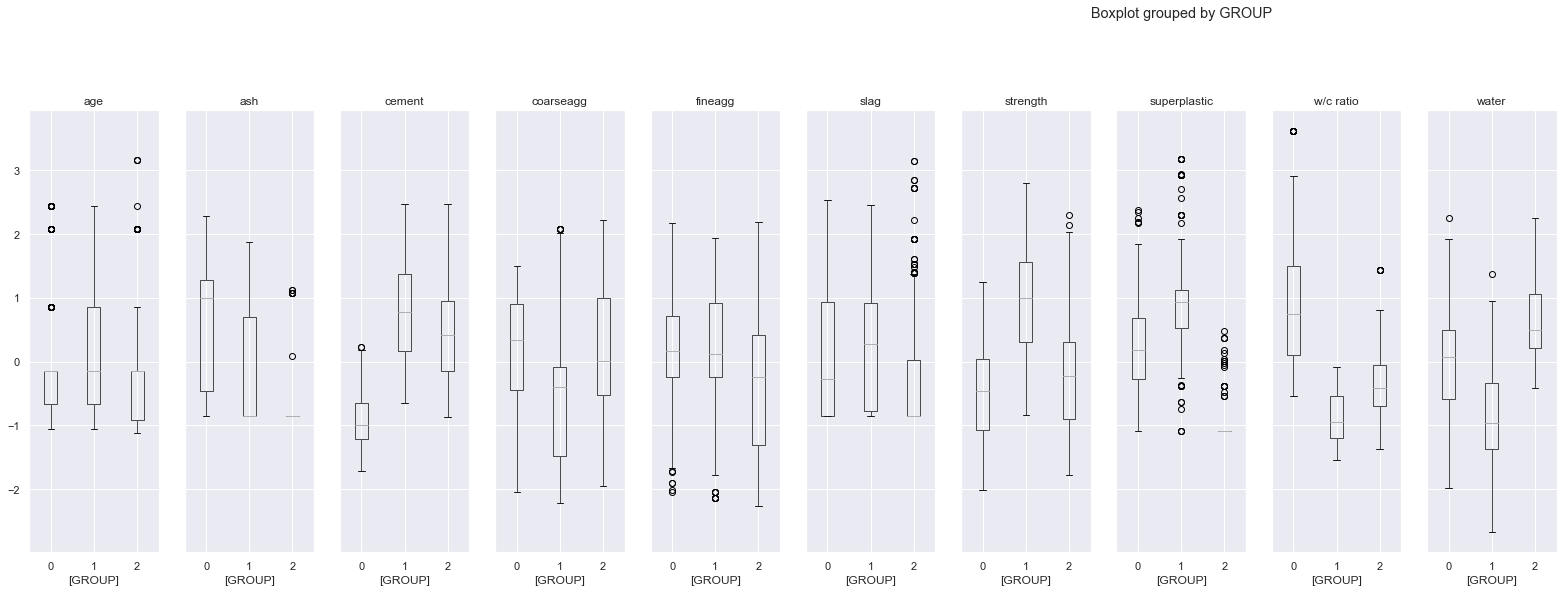

In [43]:
kdata_z.boxplot(by = 'GROUP', figsize = (40,18), layout = (2,15));

Here we analysed that there are outliers, however we had replaced the outliers with median.
The new outliers would be much closer to the center than original outliers so we will ignore these outliers.

Now we analyse the variable at cluster level. At cluster level,we want to understand how strength is impact by different attributes.

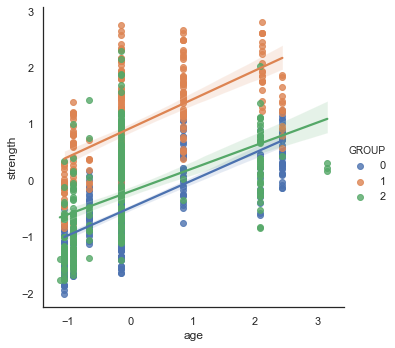

In [44]:
# strength and age
var = 'age'
with sns.axes_style("white"):
    plot=  sns.lmplot(var,'strength', data = kdata_z, hue = 'GROUP')

The more horizontal the line is ,the more weak the independent variable is in predicting the target variable

For all 3 clusters, there appear to be some relationship between strength and age.Hence, age can be an attribute which can predict strength for all 3 clusters.

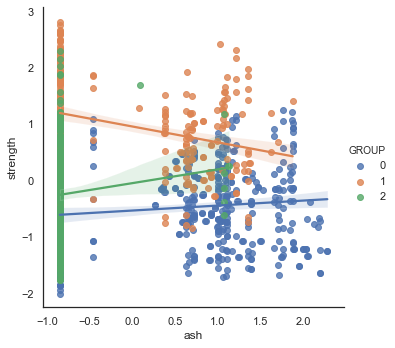

In [45]:
# strength and ash
var = 'ash'
with sns.axes_style("white"):
    plot = sns.lmplot(var, 'strength', data = kdata_z, hue = 'GROUP')

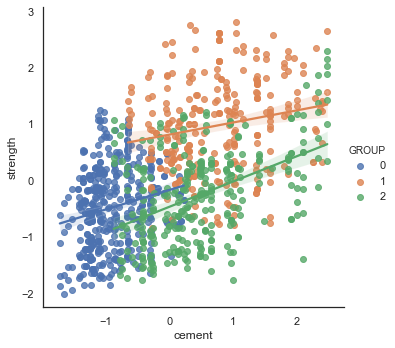

In [46]:
# strength and cement
var = 'cement'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength', data = kdata_z, hue = 'GROUP')

cluter 2 and cluster 3 seem to be some positive relationship between strength and cement.
cluster 1 seems to be straight line which means that for cluster 1 ,strength is weakly predicted by cement.

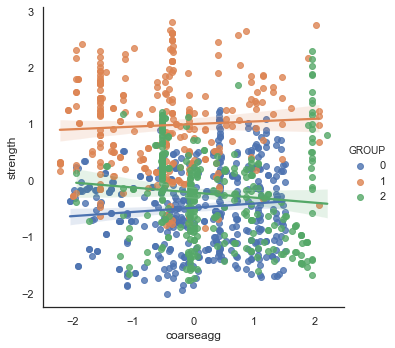

In [47]:
# strength and coarseagg
var = 'coarseagg'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength', data = kdata_z, hue = 'GROUP')

For all three clusters, there seem to be straight line which means that for group 1,2 and 3 strength is weakly predicted by coarseagg.so coarseagg may not be a good predictor for all the 3 clusters.

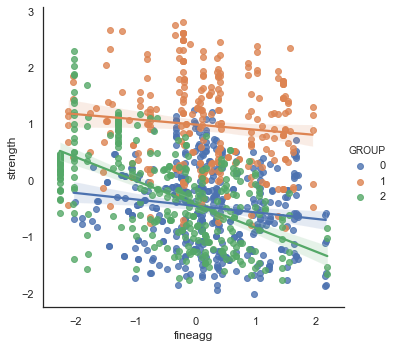

In [48]:
# strength and fineagg
var = 'fineagg'
with sns.axes_style("white"):
    plot = sns.lmplot(var, 'strength', data = kdata_z, hue = 'GROUP')

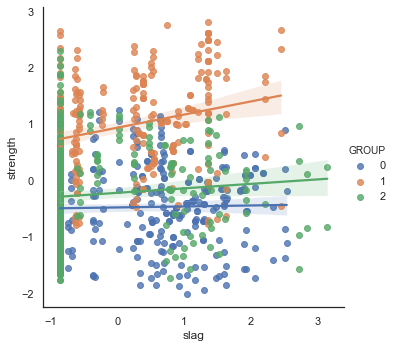

In [49]:
# strength and slag
var = 'slag'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength', data = kdata_z, hue = 'GROUP')

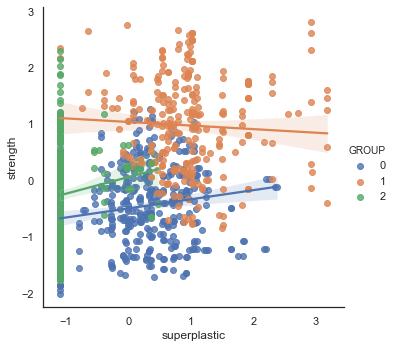

In [50]:
# strength and superplastic
var = 'superplastic'
with sns.axes_style("white"):
    plot = sns.lmplot(var, 'strength', data = kdata_z, hue = 'GROUP')

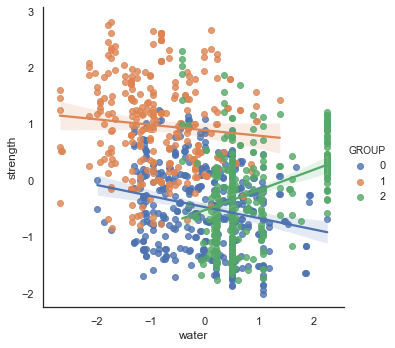

In [51]:
# strength and water
var = 'water'
with sns.axes_style("white"):
    plot = sns.lmplot(var, 'strength', data = kdata_z, hue = 'GROUP')

# Deliverable - 3(create the model)

# Obtain feature importance for the individual features and present your findings

The feature importance was seen when we performed Principal component analysis.There is also a way to identify the feature importance by decision tree regressor.

In this step ,we will build multiple algorithms and then basis the performance, we will decide the algorithm that gives the best performance.

In [52]:
# split the data into train and test
# scale the data
data_scaled = data.apply(zscore)
X = data_scaled.drop('strength', axis = 1)
y = data_scaled['strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)


# Regression Model 1: Linear Regression

In [53]:
# Build the  model with all the attributes
# Fit the model on train data
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
# Check the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}". format(col_name, regression_model.coef_[idx]))

The coefficient for cement is 0.5196808883000549
The coefficient for slag is 0.34481049771129124
The coefficient for ash is 0.1310638137717274
The coefficient for water is -0.18537015305246374
The coefficient for superplastic is 0.0891549307394475
The coefficient for coarseagg is -0.04725029304049382
The coefficient for fineagg is -0.0529986806784728
The coefficient for age is 0.518587520758098
The coefficient for w/c ratio is -0.13413522217846494


In [55]:
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(regression_model.intercept_))

The intercept for our model is -0.004269616833130525


In [56]:
 print(regression_model.score(X_train, y_train))
score_LR = regression_model.score(X_test, y_test)
print(score_LR)

0.724156395035168
0.7045875392914561


In [57]:
# Build the model with reduced dimensionality(PCA)
regression_model_pca = LinearRegression()
regression_model_pca.fit(X_train_pca, y_train_pca)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
for idx, col_name in enumerate(X_train_pca[idx]):
    print("The coefficient for {} is {}".format(col_name, regression_model_pca.coef_[idx]))

The coefficient for -3.3769579728361747 is -0.33455394508435
The coefficient for 0.43872337988996557 is 0.07724912305475155
The coefficient for 0.9833461275173219 is 0.3080061191048271
The coefficient for -1.9768453617964312 is 0.21074280772580797
The coefficient for 0.9291145495569159 is 0.514154474845297
The coefficient for -0.11227916315943902 is -0.0541149832407684


In [59]:
intercept_pca = regression_model_pca.intercept_
print("The intercept of our model is {}".format(regression_model_pca.intercept_))


The intercept of our model is 0.0017927021064034765


In [60]:
y_predict_LR_pca = regression_model_pca.predict(X_test_pca)

In [61]:
 print(regression_model_pca.score(X_train_pca,y_train_pca))
score_LR_PCA = regression_model_pca.score(X_test_pca,y_test_pca)
print(score_LR_PCA)

0.7050857707158349
0.683018725827083


# Regression Model 2:SVR

In [62]:
# Build the model with all the attributes
clf = svm.SVR()
clf.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
y_predict_SVR = clf.predict(X_test)

In [64]:
 print(clf.score(X_train,y_train))

0.9067731253851765


In [65]:
score_SVR = clf.score(X_test,y_test)
print(score_SVR)

0.8687542401430568


In [66]:
# Build the model with reduced dimensionality
clf_pca = svm.SVR()
clf_pca.fit(X_train_pca,y_train_pca)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [67]:
print(clf_pca.score(X_train_pca,y_train_pca))

0.8811892367566315


In [68]:
score_SVR_PCA = clf_pca.score(X_test_pca,y_test_pca)
print(score_SVR_PCA)

0.8480101936863362


# Regression Model 3: Ridge Regression

In [69]:
# Build the model with all the attributes
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train,y_train)
print("Ridge model", ridge.coef_)

Ridge model [ 0.51719438  0.34323741  0.12961966 -0.18611399  0.08920014 -0.04826941
 -0.05427187  0.5183708  -0.13499559]


In [70]:
ridge.score(X_train,y_train)

0.7241556534996354

In [71]:
score_ridge = ridge.score(X_test,y_test)
score_ridge

0.7046051639980988

In [72]:
# Build the model with reduced dimensionality
ridge_pca = Ridge(alpha = 0.3)
ridge_pca.fit(X_train_pca,y_train_pca)
print("Ridge model",ridge_pca.coef_)

Ridge model [-0.33448836  0.07724169  0.30791401  0.21064442  0.51393623 -0.05409699]


In [73]:
ridge_pca.score(X_train_pca,y_train_pca)

0.7050856923742885

In [74]:
score_ridge_PCA = ridge_pca.score(X_test_pca,y_test_pca)
score_ridge_PCA

0.6830136609227091

# Regression Model 4: Lasso Regression

In [75]:
# Build the model with all the attributes
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)
print("Lasso Model", lasso.coef_)

Lasso Model [ 0.36875148  0.16512557 -0.         -0.05294852  0.15013203 -0.
 -0.          0.40595262 -0.10238884]


In [76]:
lasso.score(X_train,y_train)

0.6618805846198375

In [77]:
score_lasso = lasso.score(X_test,y_test)
score_lasso

0.6292296474654642

In [78]:
# Build the model with reduced dimensionality
lasso_pca = Lasso(alpha = 0.1)
lasso_pca.fit(X_train_pca,y_train_pca)
print("Lasso Model", lasso_pca.coef_)

Lasso Model [-0.28895818  0.03635089  0.23715605  0.10543742  0.41154234 -0.        ]


In [79]:
lasso_pca.score(X_train_pca,y_train_pca)

0.6649370715354586

In [80]:
score_lasso_PCA = lasso_pca.score(X_test_pca,y_test_pca)
score_lasso_PCA

0.6291742404432715

# Regression Model 5: Polynomial Regression

In [81]:
# Build the model with all the attributes
from sklearn import linear_model
poly = PolynomialFeatures(degree = 2,interaction_only = True)
X_train3 = poly.fit_transform(X_train)
X_test3 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train3,y_train)

y_pred = poly_clf.predict(X_test3)

print(poly_clf.score(X_train3,y_train))
score_LR_poly = poly_clf.score(X_test3,y_test)
score_LR_poly

0.7896588950496017


0.7678920140074553

In [82]:
# Build the model with reduced dimensionality
poly_pca = PolynomialFeatures(degree = 2,interaction_only = True)
X_train_poly = poly_pca.fit_transform(X_train_pca)
X_test_poly = poly_pca.fit_transform(X_test_pca)

poly_clf_pca = linear_model.LinearRegression()
poly_clf_pca.fit(X_train_poly, y_train_pca)

print(poly_clf_pca.score(X_train_poly,y_train_pca))
score_LR_poly_pca = poly_clf_pca.score(X_test_poly,y_test_pca)
score_LR_poly_pca

0.7391706144446539


0.7026067019258477

# Regression Model 6 : Decision Tree Regressor

In [83]:
# Build the model with all the attributes
regressor = DecisionTreeRegressor(max_depth = 5,random_state = 1)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [84]:
# compute feature importance
feature_importances = regressor.feature_importances_
feature_names = X_train.columns

In [85]:
summary = {'Features': feature_names, 'Feature Importance ': feature_importances}
Feature_Importance_df = pd.DataFrame(summary)
print('The feature importance is :')
Feature_Importance_df

The feature importance is :


,Features,Feature Importance
0,cement,0.035666
1,slag,0.070555
2,ash,0.000000
3,water,0.026438
4,superplastic,0.014851
5,coarseagg,0.014337
6,fineagg,0.016124
7,age,0.402349
8,w/c ratio,0.419679


In [86]:
# accuracy on test data
score_DTR = regressor.score(X_test,y_test)
score_DTR

0.7476023883637307

In [87]:
# Build the model with reduced dimensionality
regressor_pca = DecisionTreeRegressor(max_depth = 5, random_state = 1)
regressor_pca.fit(X_train_pca,y_train_pca)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [88]:
score_DTR_PCA = regressor_pca.score(X_test_pca,y_test_pca)
score_DTR_PCA

0.7330194147346438

# Regression Model 7:Random Forest

In [89]:
# Build the model with all the attributes
model_rf = RandomForestRegressor(n_estimators = 50, max_features  = 3, random_state = 1)
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [90]:
# accuracy on test data
score_RF = model_rf.score(X_test,y_test)
score_RF

0.8992580280329483

In [91]:
# Build the model with reduced dimensionality
model_rf_pca = RandomForestRegressor(n_estimators=50, max_features = 3, random_state = 1)
model_rf_pca.fit(X_train_pca,y_train_pca)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [92]:
# accuracy on test data
score_RF_PCA = model_rf_pca.score(X_test_pca,y_test_pca)
score_RF_PCA

0.8697319927581751

# Regression Model 8: Ada Boost Regressor

In [93]:
# Build the model with all the attributes
AdaBC= AdaBoostRegressor(n_estimators = 50,random_state = 1)
AdaBC.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [94]:
# accuracy on test set
score_AdaBC = AdaBC.score(X_test,y_test)
score_AdaBC

0.761747275192108

In [95]:
# Build the model with reduced dimensionality
AdaBC_pca = AdaBoostRegressor(n_estimators = 50, random_state= 1)
AdaBC_pca.fit(X_train_pca,y_train_pca)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=1)

In [96]:
# accuracy on test set
score_AdaBC_PCA = AdaBC_pca.score(X_test_pca,y_test_pca)
score_AdaBC_PCA

0.7393879015014714

# Regression Model 9: Gradient Boost Regressor

In [97]:
# Build the model with all the attributes
GraBR = GradientBoostingRegressor(n_estimators = 50,random_state = 1)
GraBR.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [98]:
# accuracy on the test data
score_GraBR = GraBR.score(X_test,y_test)
score_GraBR

0.8654538131007888

In [99]:
# Build the model with reduced dimensionality
GraBR_pca = GradientBoostingRegressor(n_estimators = 50, random_state = 1)
GraBR_pca.fit(X_train_pca,y_train_pca)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
# accuracy on the test data
score_GraBR_PCA = GraBR_pca.score(X_test_pca,y_test_pca)
score_GraBR_PCA

0.8292628539932044

# Deliverable-4(Tuning the model)

# Identifying algorithms suitable for this project

Summarise all the models:

In [101]:
summary = {'score': [score_LR, score_SVR, score_lasso, score_ridge, score_LR_poly, score_DTR, score_RF,score_AdaBC, score_GraBR],
                    'score for models trained with 6  principal components': [score_LR_PCA, score_SVR_PCA, score_lasso_PCA,score_ridge_PCA,
                                                                             score_LR_poly_pca,score_DTR_PCA,score_RF_PCA,score_AdaBC_PCA,
                                                                             score_GraBR_PCA]}
models = ['Linear Regression', 'SVR', 'Lasso', 'Ridge', 'Polynomial Regression', 'Decision Tree Regressor', 'Random Forest',
                   'Ada Boost', 'Gradient Boost']
sum_df = pd.DataFrame(summary,models)
sum_df

,score,score for models trained with 6 principal components
Linear Regression,0.704588,0.683019
SVR,0.868754,0.848010
Lasso,0.629230,0.629174
Ridge,0.704605,0.683014
Polynomial Regression,0.767892,0.702607
Decision Tree Regressor,0.747602,0.733019
Random Forest,0.899258,0.869732
Ada Boost,0.761747,0.739388
Gradient Boost,0.865454,0.829263


From the above table we analyse scores of all the models.
Our main objective is to identify a model that predicts the strength of high performance concrete.
Here, we observe that Random Forest seems to give the best results.
We also found the scores for model trained with 6 Principal components to check the impact on performance with reduced dimensionality.
Hence we will analyse hyper parametertuning to identify the parameters which can enhance performance of the Random Forest.

# Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit.

 We will use the technique of grid search to get the extra performance from the model.Since the best performing model is Random 
Forest, hnece the technique will be applied on it.

In [102]:
estimator = RandomForestRegressor()
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [103]:
estimator = RandomForestRegressor()
parameters = {'n_estimators':[100],'max_depth':[10],
              'max_features':['auto'],'min_samples_leaf':[1],'bootstrap':['True'],'random_state':[1],
              'criterion':['mse']}
search = GridSearchCV(estimator = estimator, param_grid =parameters, n_jobs = 1, cv = 5,
                     verbose = 0)

In [104]:
search.fit(X,y)
search.best_params_

{'bootstrap': 'True',
 'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100,
 'random_state': 1}

In [105]:
print("Best Hyper Parameters:/n", search.best_params_)

Best Hyper Parameters:/n {'bootstrap': 'True', 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 1}


In [106]:
# creating the Random Forest Model with the best parameters
model_rf = RandomForestRegressor(bootstrap = True, n_estimators = 100, max_depth = 10,min_samples_leaf = 1,max_features = 'auto', criterion = 'mse', random_state = 1)
model_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [107]:
model_rf.score(X_train,y_train)

0.974184344410058

In [108]:
# accuracy on test data
score_RF = model_rf.score(X_test,y_test)
score_RF

0.9018376544198947

Grid search help us the optimal parameters which will help in getting the best parameters for the selected model.
By using this Grid search we observe that the performance of our model has increased from 0.89 to 0.91.

# Model performance range at 95% confidence level

In [109]:
scores = cross_val_score(model_rf, X, y, cv = 10)
CV_score_acc_model_rf = scores.mean()
CV_score_std_model_rf = scores.std()
print(scores)
print("Accuracy: %.3f%% (%.3f%%)" % (CV_score_acc_model_rf*100.0, CV_score_std_model_rf*100.0))

[0.84973245 0.90408553 0.93988567 0.92823631 0.89029737 0.93102821
 0.92193674 0.9146588  0.91293472 0.91539702]
Accuracy: 91.082% (2.433%)


As, we know that cross validation is a technique to evaluate and validate a model and estimates its performance in unseen data.
From, the calculation above, it is clear that the accuracy of the Random forest Model is expexcted to be 91.08%(+/-)standard deviation.
So if we have to perform with 95% confidence level then the model accuracy in the production environment is expected to be in the range
of: 91.082%(+/-2)*standard deviation i.e,[86.216, 95.948] which lies under performance range.